In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
from collections import deque

# Graphes partie II : Parcours de graphes

# Rappels sur les piles et files


## Qu'est-ce qu'une file et une pile ?

Une **file** est un ensemble de données qui ne peut être modifié qu'en ajoutant un élément à une extrémité, ou en retirant un à l'**autre** extrémité : c'est le principe du *premier arrivé, premier sorti* ou FIFO en anglais : *First In, First Out*.

*Exemples :* Toutes les files d'attentes, dans le cas de gens civilisés... Il existe aussi de nombreuses files d'attentes "virtuelles" en  informatique (par exemple file d'attentes d'instructions avant traitement par le processeurs, file d'attente de parcoursup, ...). Ces structures de données sont aussi intéressantes dans le cadre de la gestion des stocks et denrées périssables.

Une **pile** est un ensemble de données qui ne peut être modifié qu'en ajoutant ou retirant un élément. Ces opérations de modifications ne peuvent avoir lieu qu'à la **même** extremité de la pile : c'est le principe du *dernier arrivé, premier sorti* ou LIFO en anglais : *Last In, First Out*.

*Exemples :*
    
- Pile de Caddies au supermarché : les caddies sont rangés les uns derrières les autres. On retire un caddie par la même extremité que celle où on viendra reposer son caddie. Ainsi le caddie qu'on peut sortir est uniquement le dernier inséré !
    
- Les tours de Hanoï :

![](im/hanoi.jpg)   
    
    
Il est ici seulement possible d'ajouter ou de retirer un disque au sommet de chaque tour, qu'on pourrait nommer *pile*.

Une **pile** ou une **file** est une notion théorique, qui possède de multiples réalisations pratiques. Il est possible de les utiliser dans un grand nombre de langage informatique. Pour simplifier, dans la suite, nous étudierons seulement les piles (la manipulation des files repose sur une logique proche, elle pourra être déduite de celle des files).

Nous utiliserons les structures python `deque`, qui sont une généralisation des piles et des files (deque se prononce "dèque" et est l'abréviation de l'anglais *double-ended queue*) : il est possible d'ajouter et retirer des éléments par les deux bouts des deques. Ces opérations sont très efficaces, car les deques sont optimisés pour (plus qu'une liste, qui peut changer de taille, mais de façon plus couteuse en temps d'execution....en contrepartie de ses nombreuses autres fonctions !)

On utilisera pour ces structure *deque* les *méthodes* `append`, `pop` et `len` en employant la même syntaxe qu'avec les listes.

## Créer et utiliser des piles et files

Voic les fonctions **justes nécessaires** pour utiliser créer et utiliser les piles, en s'appuyant sur des deque :

In [2]:
def creer_pile():
    return deque()

def empiler(P,v):
    P.append(v)
    
def depiler(P):
    if len(P)==0:
        raise ValueError("Erreur : pile vide") 
    else :
        P.pop()
    return(P)

def taille(P):
    return len(P)

def est_vide(P):
    return len(P)==0

def sommet(P):
    if est_vide(P)==1:
        raise ValueError("Erreur : pile vide")
    else :
        return P[-1]

De même pour les files :

In [3]:
def creer_file():
    return deque()
   
def defiler(F):
    """ Enlève la fin de la file F, soit son dernier élément, celui tout à droite """
    if len(F)==0:
        raise ValueError("Erreur : file vide")
    else :
        F.pop()
    return(F)

def enfiler(F,v):
    """ Ajoute l'élément v au début de la file F, v devient le premier élément, celui tout à gauche """
    F.appendleft(v)

def taille(F):
    return len(F)

def est_vide(F):
    return len(F)==0

def fin(F):
    """ Retourne la fin de la file F, soit son dernier élément, celui tout à droite """
    if est_vide(F)==1:
        raise ValueError("Erreur : file vide")
    else :
        return F[-1]

# Parcours d'un graphe "simple"

On considère le problème suivant : un héros pénètre dans un enchainement labyrinthique de salles, dans lequel il doit combattre le monstre et ramener le trésor. La cartographie de ces salles est représentée ci-dessous :

![](im/lab.png)  

Afin de trouver puis vaincre le monstre, et être sûr de trouver le trésor, le héros va devoir parcourir les salles, peut-être de façon exhaustive, en partant de la salle D. Pour cela, aidons-le ! Nous allons représenter cette cartographie par un graphe, dans lequel les sommets sont les salles, et les arêtes les couloirs permettant de passer d'une salle à l'autre.

Voici la construction de ce graphe à l'aide d'un dictionnaire d'adjacence :

In [4]:
Lab = dict()
Lab['A'] = ['B', 'D']
Lab['B'] = ['A', 'C', 'E']
Lab['C'] = ['B', 'G']
Lab['D'] = ['A', 'E']
Lab['E'] = ['B', 'D', 'I']
Lab['F'] = ['G']
Lab['G'] = ['C', 'F', 'H', 'J']
Lab['H'] = ['G']
Lab['I'] = ['E', 'J']
Lab['J'] = ['I', 'G']

Utilisons alors la fonction de la partie précédente pour représenter ce graphe :

In [5]:
def dict_to_graph(dict_graphe):
    """Construit et affiche une graphe non orienté et non pondéré en networkx à partir du dictionnaire d'adjacence du format :
    dict_graphe = {'Sommet': liste des sommets adjacents}"""
    
    # Création du graphe
    graphe = nx.Graph()
    
    # Ajout des noeuds :
    for sommet in dict_graphe :
        graphe.add_node(sommet)

    # Ajout des arêtes :
    for sommet in dict_graphe : 
        for sommet_adj in dict_graphe[sommet] :
            graphe.add_edge(sommet, sommet_adj)
    
    nx.draw(graphe, node_size=800, edge_color='red', with_labels=True,font_weight='bold')
    plt.show()

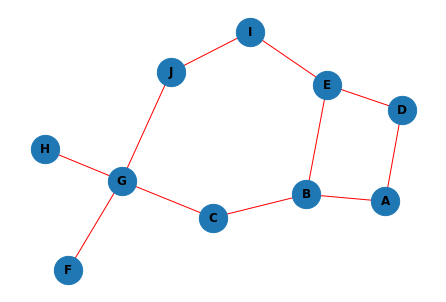

In [6]:
dict_to_graph(Lab)

Un **algorithme de parcours de graphe** est un algorithme consistant à **explorer les sommets d'un graphe de proche en proche à partir d'un sommet initial**. On va en distinguer deux principaux : le parcours en **profondeur** et le parcours en **largeur**.

Un **chemin** est un ensemble d'arrête reliant deux sommets d'un graphe.

Les algorithmes de parcours n'ont généralement pas un but propre : ils servent comme outil pour étudier une propriété globale du graphe, comme l'existence de chemin entre deux sommets, la détection de présence de cycle, etc.

## Parcours en profondeur 

Commençons avec un premier parcours de graphe : celui en **profondeur**. Le principe de cet algorithme repose sur une méthode intuitive, commune pour ne pas se perdre dans un lieu inconnu (ou un labyrinthe), en explorant de façon systématique :

- à partir du premier sommet, on essaie un chemin, avec une méthode systématique (par exemple, pour notre héros, toujours prendre le couloirs à gauche à chaque nouvelle visite de salle);

- si on se retrouve coincé (cul-de-sac), on fait demi-tour jusqu'à revenir au dernier sommet rencontré menant à une partie non encore explorée;

- quand il ne reste plus de sommet menant à une partie non encore explorée, le parcours du lieu est terminé : tout a été découvert !


Voici un exemple de l'exploration en profondeur d'un labyrinthe : 

<video controls src="vid/maze.webm" width="650"><\video>
    
Dans le cas de graphe avec au moins un cycle (comme celui de notre héros), si on retombe sur un sommet déjà visité (à cause d'un tel cycle), on choisit un autre chemin encore non exploré, pour éviter de tourner infiniement en rond !
    
**Question 1 :** Donner la liste de l'ordre des sommets visités par le héros en appliquant la méthode précédente du parcours en profondeur. Faire de même si on choisit de choisir de façon systématique le couloir de droite.

Liste des sommets visités en choisissant systématiquement le couloir de gauche : D -> A -> B -> C -> G -> H -> J ->  I -> E -> F

Liste des sommets visités en choisissant systématiquement le couloir de droite : D -> E -> I -> J -> G -> H -> C -> B -> A -> F

**Question 2 :** On considère, grâce aux animations suivantes, 4 parcours d'un meme graphe. Lesquels peuvent êtres considérés comme des parcours en profondeur ?

Parcours 1 :

![](im/DFS_1.gif)   

Parcours 2 :

![](im/DFS_2.gif)   

Parcours 3 :

![](im/DFS_3.gif)  

Parcours 4 :

![](im/DFS_4.gif)   

Le parcours 1 (et le 3 si on l'oriente de bas en haut) correspondent à des parcours en profondeur.

On nomme un tel parcours un **parcours en profondeur** (ou **DFS** pour ***D**eep **F**irst **S**earch* en anglais) car  on explore chaque chemin jusqu'à son extrémité finale, dans toute sa profoneur. 


Implémentons de un tel parcours en profondeur en python : pour cela, il va falloir une structure de donnée permettant de stocker les sommets à visiter. Le fait de parcourir en profondeur (de toujours *avancer* dans le graphe sans avoir exploré tous les sommets adjacents des premiers sommets visités) se retrouvera dans l'usage de **piles** : en effet, on commence à explorer les voisins du dernier sommet visité, le dernier *empilé*.

**Question 3 :** Compléter le code suivant permettant de retourner la liste de l'ordre du parcours en profondeur d'un graphe. Expliquer la ligne contenant`if sommet(A_visiter) in Visités`.

In [8]:
def DFS(Graphe, sommet_dep):
    """ Retourne la liste des sommets du graphe Graphe parcouru lors d'un parcours en profondeur, en partant du sommet sommet_dep"""
    
    sommet_vis = sommet_dep # Sommet actuellement visité
    Visités = [sommet_vis] # Liste des sommets déjà visités
    
    A_visiter = creer_pile() # Pile des sommets à visiter
    for sommet_adj in Graphe[sommet_vis] : # Les sommets à visiter sont les sommets adjacents au sommet actuellement visité
        empiler(A_visiter, sommet_adj)
    
    while est_vide(A_visiter) == False :    
        
        # On considère un sommet de la pile encore non visité :
        if sommet(A_visiter) in Visités :
            depiler(A_visiter)
        else :
            sommet_vis = sommet(A_visiter) # sommet visité

            # On indique qu'on l'a visité et qu'il n'est plus à visiter :
            depiler(A_visiter)
            Visités.append(sommet_vis)

            # On met à jour la pile des sommets à visiter, à partir des voisins :
            for sommet_adj in Graphe[sommet_vis] :
                if sommet_adj not in Visités :
                    empiler(A_visiter, sommet_adj)

    return Visités

In [64]:
def DFS(Graphe, sommet_dep):
    """ Retourne la liste des sommets du graphe Graphe parcouru lors d'un parcours en profondeur, en partant du sommet sommet_dep"""
    
    Visités = [] # Liste des sommets déjà visités
    
    A_visiter = creer_pile() # Pile des sommets à visiter
    empiler(A_visiter, sommet_dep) # Premier sommet à visiter : celui de départ !
    
    while est_vide(A_visiter) == False :    
        
        # On considère un sommet de la pile encore non visité :
        if sommet(A_visiter) in Visités :
            depiler(A_visiter)
        else :
            sommet_vis = sommet(A_visiter) # sommet visité

            # On indique qu'on l'a visité et qu'il n'est plus à visiter :
            depiler(A_visiter)
            Visités.append(sommet_vis)

            # On met à jour la pile des sommets à visiter, à partir des voisins :
            for sommet_adj in Graphe[sommet_vis] :
                if sommet_adj not in Visités :
                    empiler(A_visiter, sommet_adj)

    return Visités

Testons :

In [9]:
DFS(Lab, 'D')

['D', 'E', 'I', 'J', 'G', 'H', 'F', 'C', 'B', 'A']

**Question 3bis :** La méthode étant systématique et faisant appel à une pile, il est possible d'écrire un algorithme de parcours en profondeur de façon récursive. Compléter le code suivant dans ce but :

In [14]:
def DFS_rec(Graphe, sommet_dep) :
    """ Retourne la liste des sommets du graphe Graphe parcouru lors d'un parcours en profondeur, en partant du sommet sommet_dep, de façon récursive"""

    # Exploration récursive à partir d'un sommet :
    def explorer(Graphe, sommet_vis) :
        for sommet_adj in Graphe[sommet_vis] :
            # On va explorer tous les sommets adjacents non déjà visités :
            if sommet_adj not in Visités :
                Visités.append(sommet_adj) # on visite sommet_adj
                explorer(Graphe, sommet_adj) # on explore les voisins de sommet_adj
    
    Visités = [sommet_dep]
    
    explorer(Graphe, sommet_dep)
    
    return Visités

In [15]:
DFS_rec(Lab, 'D')

['D', 'A', 'B', 'C', 'G', 'F', 'H', 'J', 'I', 'E']

*Remarques :*

- *Pas de pile ici, car la récursivité contient la pile d'exécution !*

- *Les algorithmes présentés ici ne sont pas les plus "courants" pour le DFS, car ils n'utilisent que deux catégories pour classer les sommets ("A visiter" et "Visités") au lieu de 3 pour les algorithmes les plus "classiques".*

## Parcours en largeur

Notre héros, sachant que le monstre se trouve surement "au fond" de la carte, adopte alors une attitude plus prudente : plutôt que de chercher à progresser le plus rapidement possible "en profondeur", donc vers le monstre, va dorénavant chercher à explorer un maximum la carte, accumuler de la confiance et repousser la rencontre possiblement fatale le plus tard possible. Nous allons donc l'aider à parcourir différement la carte : on fera alors un **parcours en largeur** ( ou **BFS** pour ***B**readth **F**irst **S**earch* en anglais).

Voici la procédure à suivre pour parcourir en largeur en explorant de façon systématique :

- à partir du premier sommet, on visite **tous les sommets voisins**, de façon systématique (par exemple, pour notré héros, en commençant par la salle la plus à gauche et en finissant par la plus à droite); **avant d'aller plus loin**;

- on poursuit alors l'exploration à partir du premier de ces voisins : on visite alors les voisins de ce voisin, s'ils n'ont pas déjà été visités;

- on revient alors au deuxième voisin du sommet initial, et on poursuit l'exploration par ses voisins, et ainsi de suite, jusqu'à ce qu'il n'y ait plus de sommets à visiter.

Dasn cette procédure, l'ordre de visite est déterminé par la "distance" au sommet initial : on va commencer à explorer les voisins des premiers sommets visités. Il s'agit donc d'une procédure pouvant s'appuyer sur des **files** : les sommets *enfilés* en premiers seront les premiers à être explorés.

**Question 4 :** Donner la liste de l'ordre des sommets visités par le héros en appliquant la méthode précédente du parcours en largeur, en commençant par la salle la plus à gauche et en finissant par la plus à droite, puis l'inverse :

Liste des sommets visités en commençant par la salle la plus à gauche et en finissant par la plus à droite : D -> A -> E -> B -> I -> C -> J -> H -> F

Liste des sommets visités en commençant par la salle la plus à droite et en finissant par la plus à gauche : D -> E -> A -> I -> B -> J -> C -> G -> -> F

**Question 5 :**  Adapter le code (itératif) du parcours en profondeur pour effectuer un parcours en largeur. 

*Aide : Même si l'ordre des parcours est très différent, les procédures différent en réalité très peu : le seul changement réside dans le choix de la prochaine salle à explorer parmis celles stockées dans la strucure dédiée. Pour un parcours en profondeur, on prend la dernière ajoutée, alors que pour le parcours en largeur, on prend la première : ce ne sont pas les mêmes strucures (pile pour le DFS, file pour le BFS)*

In [18]:
def BFS(Graphe, sommet_dep):
    """ Retourne la liste des sommets du graphe Graphe parcouru lors d'un parcours en largeur, en partant du sommet sommet_dep"""
    
    sommet_vis = sommet_dep # Sommet actuellement visité
    Visités = [sommet_vis] # Liste des sommets déjà visités
    
    A_visiter = creer_file() # File des sommets à visiter
    for sommet_adj in Graphe[sommet_vis] : # Les sommets à visiter sont les sommets adjacents au sommet actuellement visité
        enfiler(A_visiter, sommet_adj)
    
    while est_vide(A_visiter) == False :    
        
        # On considère un sommet de la pile encore non visité :
        if fin(A_visiter) in Visités :
            defiler(A_visiter)
        else :
            sommet_vis = fin(A_visiter)

            # On indique qu'on l'a visité :
            defiler(A_visiter)
            Visités.append(sommet_vis)

            # On met à jour la pile des sommets à visiter, à partir des voisins :
            for sommet_adj in Graphe[sommet_vis] :
                if sommet_adj not in Visités :
                    enfiler(A_visiter, sommet_adj)

    return Visités

In [19]:
BFS(Lab, 'D')

['D', 'A', 'E', 'B', 'I', 'C', 'J', 'G', 'F', 'H']

## Résumé :

![](im/DFS.gif)  

![](im/BFS.gif)  

Dans quels cas utiliser un parcours plutôt qu'un autre ? Il ne faut pas oublier que ces procédures de aprcours sont rarement utilisées pour elles-mêmes, mais plutôt comme *support* d'un algorithme permettant de détemriner une autre propriété du graphe : par exemple, existe-t-il un cycle dans le graphe ? Est-il connexe ? Quel est le plus court chemin pour aller d'un certain sommet à un autre ?

Le parcours en profondeur choisit un chemin, va au bout de ce chemin, puis revient sur ses pas et fait pareil pour tous les chemins possibles dans le graphe donné. L’objectif du DFS est de faire des recherches complètes ou bien du retour sur trace (backtracking). On explore un chemin à la fois, dans les moindres recoins pour être sûr d’épuiser toutes les possibilités par chemin.

Le parcours en largeur est utilisé pour explorer un graphe rapidement dans la largeur, couche par couche, niveau par niveau. Chaque itération va augmenter la distance par rapport au nœud de départ. Un des objectifs avec le BFS est de déterminer rapidement si un chemin existe entre deux points. On peut ainsi éliminer *rapidement* un chemin s'il part *dans la mauvaise direction*. Il peut aussi déterminer le nombre de niveaux qui sépare ces deux points. Cet algorithme va explorer, niveau par niveau dans tous les chemins en même temps, au lieu de se concentrer profondément chemin par chemin comme le DFS.

![](im/dfsbfs.gif)  

D'une façon plus générale, les algorithmes cherchant une optimisation de chemin reposent sur le BFS, alors que ceux sur la recherche de propriétés (existence cycle, etc) reposent sur le DFS.

# Un application fameuse : l'algorithme de Dijkstra

D'après la fiche Wikipédia : *En théorie des graphes, l'algorithme de Dijkstra sert à résoudre le problème du plus court chemin. Il permet, par exemple, de déterminer un plus court chemin pour se rendre d'une ville à une autre connaissant le réseau routier d'une région. Plus précisément, il calcule des plus courts chemins à partir d'une source vers tous les autres sommets dans un graphe orienté pondéré par des réels positifs. On peut aussi l'utiliser pour calculer un plus court chemin entre un sommet de départ et un sommet d'arrivée. L'algorithme porte le nom de son inventeur, l'informaticien néerlandais Edsger Dijkstra, et a été publié en 19593.*

**Question 6 :** A votre avis, l'aglorithme de Dijkstra repose plutôt sur un parcours en profondeur ou en largeur ?

Revenons à notre graphe pondéré de la partie précédente :

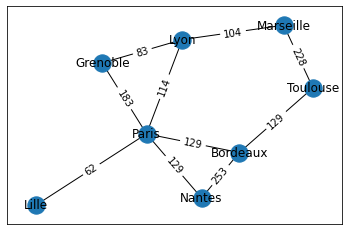

In [20]:
# Création du graphe
graphe_train_pond = nx.Graph()

# Ajout de noeuds :
graphe_train_pond.add_node("Lille")
graphe_train_pond.add_node("Paris")
graphe_train_pond.add_node("Marseille")
graphe_train_pond.add_node("Lyon")
graphe_train_pond.add_node("Bordeaux")
graphe_train_pond.add_node("Grenoble")
graphe_train_pond.add_node("Nantes")
graphe_train_pond.add_node("Toulouse")

# Ajout d'arêtes (pondération : durée du trajet en minutes dasn l'argument 'weight') :
graphe_train_pond.add_edge("Lille","Paris", value = 1/62, weight = 62)
graphe_train_pond.add_edge("Nantes","Paris", value = 1/129, weight = 129)
graphe_train_pond.add_edge("Bordeaux","Paris", value = 1/129, weight = 129)
graphe_train_pond.add_edge("Lyon","Paris", value = 1/114, weight = 114)
graphe_train_pond.add_edge("Bordeaux","Nantes", value = 1/253, weight = 253)
graphe_train_pond.add_edge("Bordeaux","Toulouse", value = 1/129, weight = 129)
graphe_train_pond.add_edge("Marseille","Toulouse", value = 1/228, weight = 228)
graphe_train_pond.add_edge("Marseille","Lyon", value = 1/104, weight = 104)
graphe_train_pond.add_edge("Grenoble","Lyon", value = 1/83, weight = 83)
graphe_train_pond.add_edge("Grenoble","Paris", value = 1/183, weight = 183)

# Représentation graphique à l'aide de Matplotlib, en affichant les pondérations sur chaque arête :
pos=nx.spring_layout(graphe_train_pond) # pos = nx.nx_agraph.graphviz_layout(G)
nx.draw_networkx(graphe_train_pond,pos)
labels = nx.get_edge_attributes(graphe_train_pond,'weight')
nx.draw_networkx_edge_labels(graphe_train_pond,pos,edge_labels=labels)
plt.show()

Testons la recherche du plus court chemin (en terme de durée de parcours), à l'aide de l'agorithme de Dijkstra (disponible dans `NetworkX`) :

In [23]:
nx.dijkstra_path(graphe_train_pond, 'Lille', 'Toulouse', weight='weight')

['Lille', 'Paris', 'Bordeaux', 'Toulouse']

In [29]:
nx.dijkstra_path(graphe_train_pond, 'Marseille', 'Bordeaux', weight='weight')

['Marseille', 'Lyon', 'Paris', 'Bordeaux']

Pour tester de nombreux parcours de graphes : http://mpechaud.fr/scripts/parcours/index.html